In [1]:
import jax
import jax.numpy as np
import jax.random as rnd

import matplotlib.pyplot as plt

## PARAMS

In [2]:
key = rnd.PRNGKey(0)
out_dim = 1
in_dim  = 10
hid_dim = 10
N = 300

mean_coef = 1
var_coef  = 1 

/Users/tristan/anaconda3/envs/lab/lib/python3.7/site-packages/jax/lib/xla_bridge.py:115: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [15]:
!pwd

/Users/tristan/workspace/Curvature/Linear


In [3]:
key, _ = rnd.split(key)
mean = rnd.normal(key, shape=(in_dim,))
print(mean[0])  # -0.69622177

-2.6105604


In [4]:
key, _ = rnd.split(key)
var = rnd.normal(key, shape=(N, in_dim))
print(var[0,0]) # -1.6442325
X = mean * mean_coef + var * var_coef

0.44736564


In [5]:
key, _ = rnd.split(key)
Y = rnd.normal(key, shape=(out_dim,))
print(Y[0]) # -0.48762515

-0.48762515


## MODEL

In [6]:
key, _ = rnd.split(key)
W1 = rnd.normal(key, shape=(in_dim, hid_dim))
key, _ = rnd.split(key)
W2 = rnd.normal(key, shape=(hid_dim, out_dim))
W = (W1, W2)
pred = lambda w,x: x.dot(w[0]).dot(w[1])
print(W[0][0,0], W[1][0,0]) # -2.2194185

0.31043887 -0.83827037


## HELPERS

In [7]:
from jax import jit, jacfwd, jacrev

def hessian(fun):
    return jit(jacfwd(jacrev(fun)))

loss = lambda o,y: ((o-y)**2).mean()
loss = lambda o,y: ((-2*o*y)).mean()
predloss = lambda w,x,y: loss(pred(w,x),y)
H = hessian(predloss)

In [8]:
hs = H(W,X,Y)

In [9]:
len(hs), len(hs[0]), len(hs[1]), hs[0][0].shape, hs[0][1].shape, hs[1][0].shape, hs[1][1].shape

(2, 2, 2, (10, 10, 10, 10), (10, 10, 10, 1), (10, 1, 10, 10), (10, 1, 10, 1))

In [10]:
h_reshaped = []
for h in hs:
    new_row = []
    for h_ in h:
        #h_ = h_.transpose((1,0,3,2)).reshape((h_.shape[0]*h_.shape[1],h_.shape[3]*h_.shape[2]))
        h_ = h_.reshape((h_.shape[0]*h_.shape[1],h_.shape[3]*h_.shape[2]))
        new_row.append(h_)
    h_reshaped.append(new_row)

In [11]:
h_concat = []
for i,h in enumerate(h_reshaped):
    h = np.concatenate(h, axis=1)
    h_concat.append(h)
h_concat = np.concatenate(h_concat, axis=0)
#    for j,h_ in enumerate(h):
#        print(h_.shape)

In [12]:
#h = h.transpose((1,0,3,2)).reshape((60,60))
#s,u = np.linalg.eig(h)
#s = s.astype("float32")
#u = u.astype("float32")

## Plots

In [13]:
plt.style.use("dark_background")

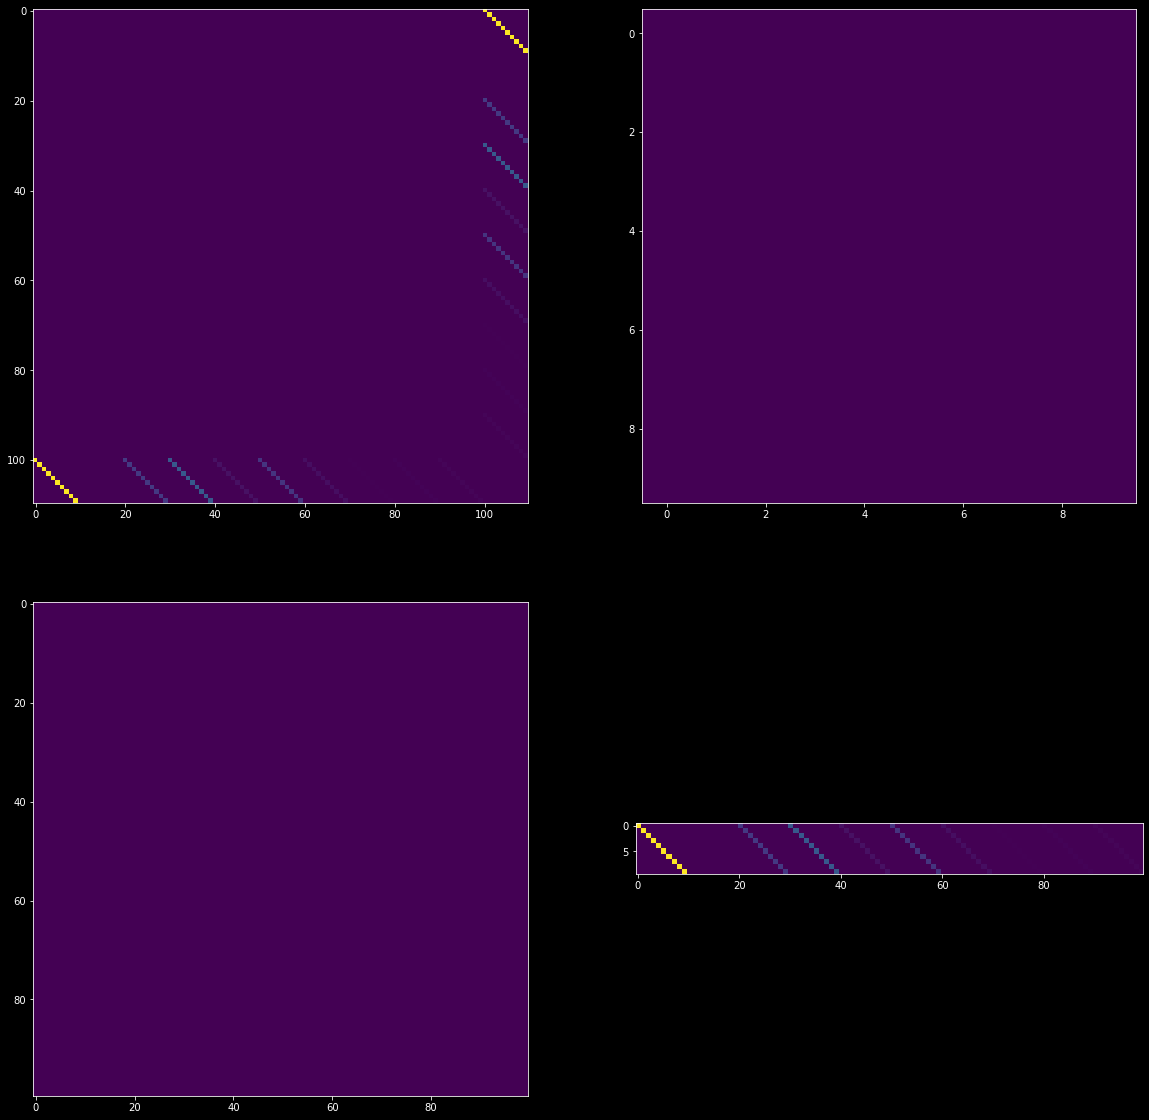

In [14]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax[0,0].imshow((h_concat**2))
ax[0,1].imshow((h_concat**2)[-hid_dim:,-hid_dim:])
ax[1,0].imshow((h_concat**2)[:-hid_dim,:-hid_dim])
ax[1,1].imshow((h_concat**2)[-hid_dim:,:-hid_dim])

In [27]:
(h_concat[:400,:400]**2).sum()

DeviceArray(298894.38, dtype=float32)

In [28]:
(h_concat[400:,400:]**2).sum()

DeviceArray(0., dtype=float32)

In [24]:
(h_concat[400:,:400]**2).sum()

DeviceArray(1.5593675e+10, dtype=float32)

In [25]:
(h_concat[:400,400:]**2).sum()

DeviceArray(1.5593683e+10, dtype=float32)